In [1]:
### Importing libraries

In [79]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
#from mplsoccer.pitch import Pitch

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
## Reading the data set

In [89]:
df = pd.read_csv('Training_raw.csv',encoding='latin-1')

In [90]:
df.head()

,id,minute,second,type.name,team.name,player.id,player.name,position.name,location.x,location.y,shot.end_location.x,shot.end_location.y,shot.end_location.z,shot.type.name,shot.open_goal,shot.outcome.name,location.x.GK,location.y.GK,DistToGoal,DistToKeeper,AngleToGoal,AngleToKeeper,shot.statsbomb_xg,density,density.incone,distance.ToD1,distance.ToD2,AttackersBehindBall,DefendersBehindBall,DefendersInCone,shot.first_time,shot.body_part.name,shot.technique.name,play_pattern.name
0,868e1835-109d-4099-8288-f1b162a6a10f,2,19,Shot,Barcelona,3726,Gerard Deulofeu LÌÁzaro,Right Midfield,109.8,42.0,120.0,45.3,0.6,Open Play,NaN,Off T,118.6,39.4,10.39,1.52,101.09,66.80,0.29,1.051088,0.000000,1.720465,4.134005,2,5,0,True,Right Foot,Normal,Regular Play
1,5ad6df39-8457-4b15-99ea-88149ec5d04f,13,44,Shot,Barcelona,5503,Lionel AndrÌ©s Messi Cuccittini,Center Forward,99.0,26.3,120.0,37.0,3.3,Free Kick,NaN,Off T,119.1,41.2,25.07,1.50,56.88,143.13,0.07,0.685279,0.441749,10.584895,10.912378,6,9,5,NaN,Left Foot,Normal,From Free Kick
2,bf56831a-e2bf-4830-ac59-12fcf6f098f0,27,53,Shot,Real Betis,6657,Sergio LeÌ_n Limones,Center Forward,108.3,31.9,109.2,32.4,NaN,Open Play,NaN,Blocked,117.4,36.9,14.23,4.05,55.30,39.99,0.12,1.100139,0.632456,1.581139,2.555386,0,3,1,NaN,Right Foot,Normal,From Throw In
3,1be3ae19-50dd-44e8-ba18-567092a091be,28,26,Shot,Barcelona,6379,Sergi Roberto Carnicer,Center Attacking Midfield,110.9,25.8,111.6,26.6,NaN,Open Play,NaN,Blocked,118.5,36.4,16.87,3.90,32.65,22.62,0.04,0.698430,0.698430,1.431782,-17.265283,0,1,1,NaN,Left Foot,Half Volley,Regular Play
4,ab319ba2-6a61-46a4-826e-d34284edbecb,38,3,Shot,Barcelona,6379,Sergi Roberto Carnicer,Center Attacking Midfield,108.2,40.1,120.0,41.0,1.7,Open Play,NaN,Goal,117.7,41.7,11.80,2.86,90.49,126.47,0.30,0.402424,0.000000,6.500000,9.928243,2,4,0,True,Right Foot,Normal,Regular Play


In [8]:
len(df)

6672

## Shot outcome

In [15]:
temp = df.groupby('shot.outcome.name')['shot.outcome.name'].count().reset_index(name='cnt')
temp

,shot.outcome.name,cnt
0,Blocked,1490
1,Goal,923
2,Off T,2113
3,Post,169
4,Saved,1744
5,Saved Off Target,21
6,Saved to Post,11
7,Wayward,201


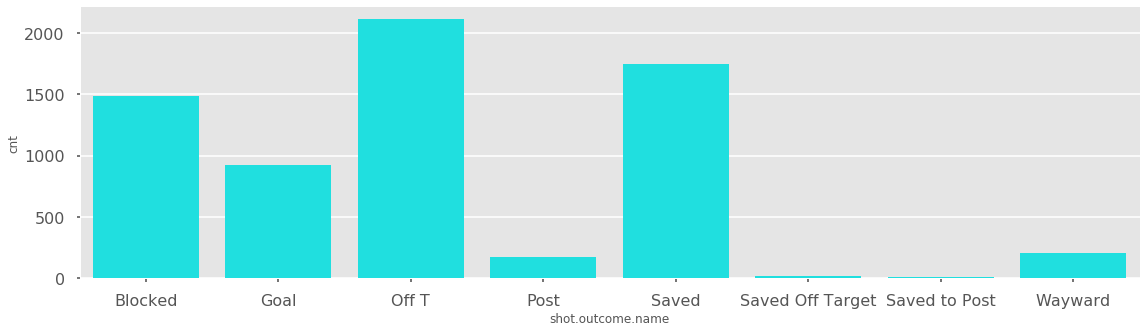

In [38]:
f, ax = plt.subplots(figsize=(19, 5))
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="shot.outcome.name", y="cnt", data=temp,
            label="shot.outcome.name", color="cyan")



In [49]:
temp = df.loc[df['shot.outcome.name']=='Goal']
temp = temp.groupby('shot.type.name')['shot.type.name'].count().reset_index(name='cnt')
temp

,shot.type.name,cnt
0,Free Kick,44
1,Open Play,812
2,Penalty,67


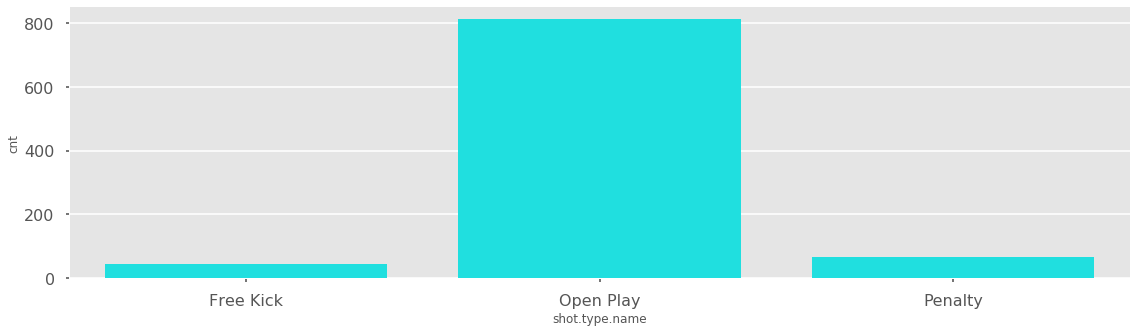

In [51]:
f, ax = plt.subplots(figsize=(19, 5))
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="shot.type.name", y="cnt", data=temp,
            label="shot.type.name", color="cyan")



In [53]:
df['shot.outcome.name'].unique()

array(['Off T', 'Blocked', 'Goal', 'Post', 'Saved', 'Wayward',
       'Saved to Post', 'Saved Off Target'], dtype=object)

In [61]:
#Converting shot outcome to 1- Goal else 0

In [62]:
temp = df


In [63]:
temp['shot.outcome.name']=temp['shot.outcome.name'].apply(lambda x: 1 if x=='Goal' else 0)

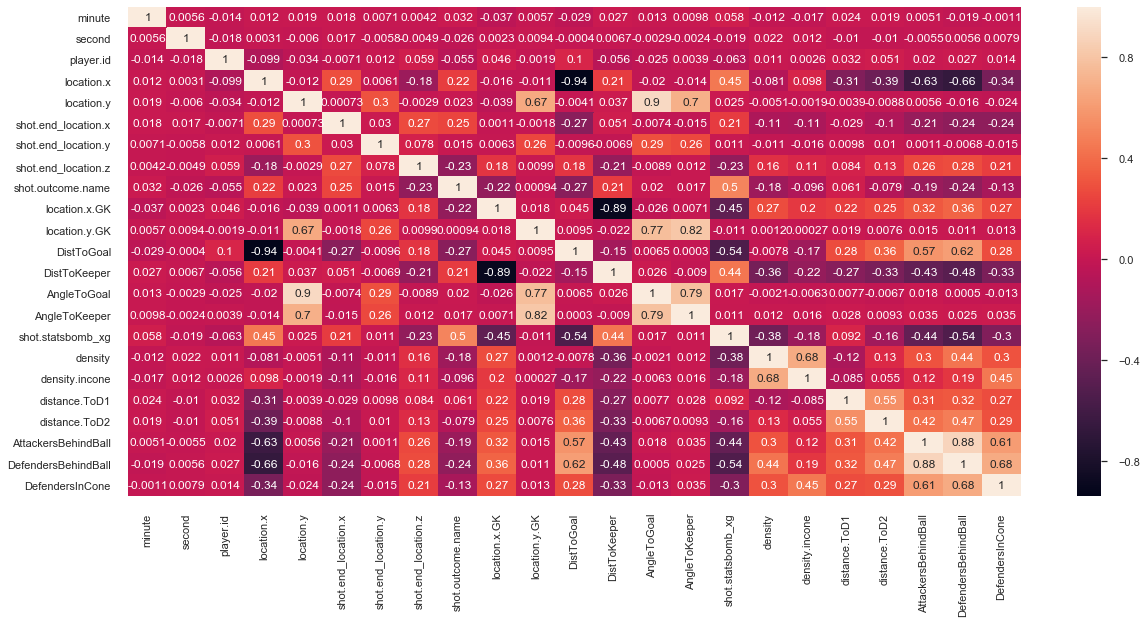

In [64]:
sns.set(rc={'figure.figsize':(20,9)})

corrMatrix = temp.corr()
sns.heatmap(corrMatrix, annot=True)


In [80]:
### Success rate of penalties

In [92]:
temp = df.loc[df['shot.type.name']=='Penalty']

In [93]:
temp['shot.outcome.name']=temp['shot.outcome.name'].apply(lambda x: 1 if x=='Goal' else 0)

/Users/mihirahuja/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
temp = temp.groupby('shot.outcome.name')['shot.outcome.name'].count().reset_index(name='cnt')

In [102]:
print('Success % for a penalty kick is - ',str(temp.iloc[1]['cnt']/(temp.iloc[1]['cnt']+temp.iloc[0]['cnt'])))

Success % for a penalty kick is -  0.7976190476190477


In [103]:
### Success rate of non-penalties

In [104]:
temp = df.loc[df['shot.type.name']!='Penalty']

In [105]:
temp['shot.outcome.name']=temp['shot.outcome.name'].apply(lambda x: 1 if x=='Goal' else 0)

/Users/mihirahuja/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
temp = temp.groupby('shot.outcome.name')['shot.outcome.name'].count().reset_index(name='cnt')

In [109]:
print('Success % for a non-penalty kick is - ',str(temp.iloc[1]['cnt']/(temp.iloc[1]['cnt']+temp.iloc[0]['cnt'])))

Success % for a non-penalty kick is -  0.129933211900425
